In [81]:
import hddm
import pandas as pd
import matplotlib.pyplot as plt
import os
path = '/Users/Krista/Documents/github_repositories/testing-master/'

In [82]:
os.chdir(path)
os.getcwd()

'/Users/Krista/Documents/github_repositories/testing-master'

In [83]:
data = hddm.load_csv('./200t.csv')
data.columns = data.columns.str.strip()
data.head(4), data.tail(4)

(    rt  response  gen_drift  gen_bound  subj_idx cond
 0  0.7         0   0.008236   0.416318         0   lc
 1  0.7         0   0.008236   0.558162         0   lc
 2  0.7         1   0.008236   0.550805         0   lc
 3  0.7         1   0.051858   1.233108         0   lc,
           rt  response  gen_drift  gen_bound  subj_idx cond
 39996  0.182         0   1.000000   0.697347        49   hv
 39997  0.182         0   1.000000   0.627769        49   hv
 39998  0.202         0   0.762235   0.609636        49   hv
 39999  0.342         0   0.189445   0.602659        49   hv)

In [84]:
data[data.cond == "lc"].gen_drift.mean(), data[data.cond == "hc"].gen_drift.mean()

(0.87214027444392084, 0.82028628012055327)

In [159]:
data[data.cond == "lv"].gen_drift.mean(), data[data.cond == "hv"].gen_drift.mean()

(0.87035138087491959, 0.81409077881246172)

In [156]:
data[data.cond == "lc"].rt.mean(), data[data.cond == "hc"].rt.mean()

(0.37929360000000006, 0.41000160000000008)

In [160]:
data[data.cond == "lc"].gen_bound.mean(), data[data.cond == "hc"].gen_bound.mean()

(0.70259552954873794, 0.74824682897464856)

In [85]:
data[data.cond == "lv"].gen_bound.mean(), data[data.cond == "hv"].gen_bound.mean()

(0.67194650297462943, 0.86589446102759937)

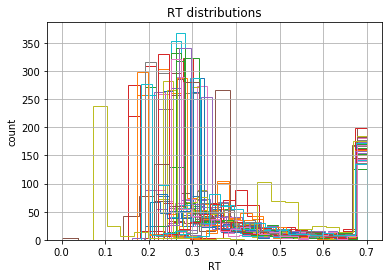

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [87]:
comb_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond', 'a':'cond'},
                        include=['v'], p_outlier=0.05)
comb_stim.find_starting_values()
comb_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1000 of 1000 complete in 425.3 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [88]:
drift_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond'},
                        include=['v'], p_outlier=0.05)
drift_stim.find_starting_values()
drift_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1000 of 1000 complete in 365.3 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [89]:
bound_stim = hddm.HDDM(data, bias=False, depends_on={'a':'cond'},
                        include=['a'], p_outlier=0.05)
bound_stim.find_starting_values()
bound_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1000 of 1000 complete in 380.0 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [91]:
drift_stats = drift_stim.gen_stats()
drift_stats[drift_stats.index.isin(['v(hc)','v(lc)', 'v(hv)','v(lv)'])]

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(hc),0.0300861,0.0279515,-0.0220648,0.0110602,0.0298746,0.0491054,0.0850442,0.00158013
v(hv),-0.0257127,0.0267125,-0.0746771,-0.0444785,-0.0259787,-0.00820329,0.0289677,0.0012663
v(lc),0.477031,0.0290649,0.419832,0.458231,0.477177,0.496944,0.533755,0.00147895
v(lv),0.429565,0.0321053,0.363203,0.408769,0.430539,0.449755,0.492871,0.00201018


In [92]:
bound_stats = bound_stim.gen_stats()
bound_stats[bound_stats.index.isin(['a(hc)','a(lc)', 'a(hv)','a(lv)'])]

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(hc),0.931685,0.0139668,0.904096,0.922171,0.931439,0.941437,0.95925,0.00048914
a(hv),1.01323,0.0136023,0.985599,1.00386,1.01395,1.02199,1.04053,0.00047326
a(lc),0.873317,0.0136498,0.846822,0.864101,0.873725,0.88214,0.900481,0.0004159
a(lv),0.836877,0.013718,0.810206,0.827507,0.836626,0.846171,0.863671,0.000545927


In [93]:
comb_stats = comb_stim.gen_stats()
comb_stats[comb_stats.index.isin(['a(hc)','a(lc)', 'a(hv)','a(lv)', 'v(hc)','v(lc)', 'v(hv)','v(lv)'])]

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(hc),0.932333,0.0133189,0.906582,0.923496,0.932299,0.940946,0.959427,0.000451885
a(hv),1.01385,0.0135825,0.986601,1.00482,1.01437,1.02305,1.04166,0.000514165
a(lc),0.876998,0.0132134,0.849605,0.868133,0.877467,0.886457,0.901463,0.000466868
a(lv),0.838365,0.0132366,0.814063,0.828739,0.838506,0.846868,0.866092,0.000462493
v(hc),0.030322,0.0274527,-0.0210727,0.0114731,0.0309619,0.0486564,0.0817164,0.00167799
v(hv),-0.0319064,0.0264666,-0.0840208,-0.0489091,-0.032237,-0.0150676,0.0216991,0.00151457
v(lc),0.457891,0.0279451,0.401417,0.439871,0.45822,0.476529,0.511453,0.0014983
v(lv),0.397503,0.0310586,0.337199,0.376105,0.396839,0.418239,0.457602,0.00202337


In [94]:
# comb_stim.plot_posteriors('a', 'v')

In [95]:
v_lc, v_hc = comb_stim.nodes_db.node[['v(lc)', 'v(hc)']]
v_lv, v_hv = comb_stim.nodes_db.node[['v(lv)', 'v(hv)']]
a_lv, a_hv = comb_stim.nodes_db.node[['a(lv)', 'a(hv)']]
a_lc, a_hc = comb_stim.nodes_db.node[['a(lc)', 'a(hc)']]

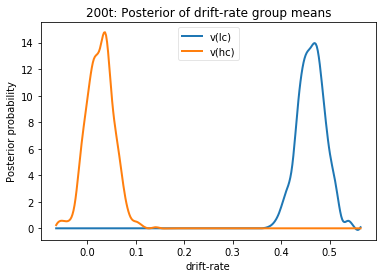

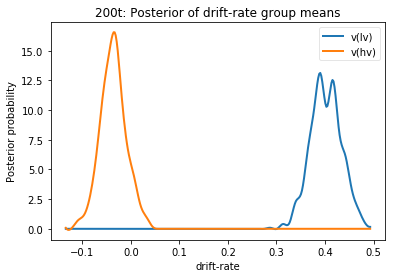

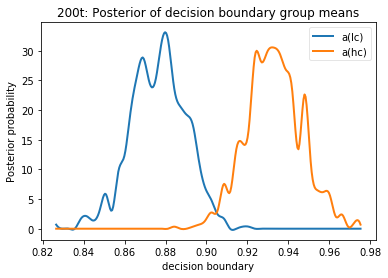

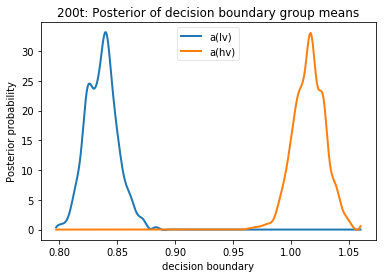

In [96]:
hddm.analyze.plot_posterior_nodes([v_lc, v_hc])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('200t: Posterior of drift-rate group means')
plt.savefig('200t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv, v_hv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('200t: Posterior of drift-rate group means')
plt.savefig('200t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc, a_hc])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('200t: Posterior of decision boundary group means')
plt.savefig('200t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv, a_hv])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('200t: Posterior of decision boundary group means')
plt.savefig('200t_bound_vol.pdf')



In [ ]:
# print("P(low_conflict_drift > high_conflict_drift) = ", (v_hc.trace() > v_lc.trace()).mean())
# print("P(low_conflict_bound > high_conflict_bound) = ", (a_hc.trace() > a_lc.trace()).mean())
# print("P(high_volatility_bound > low_volatility_bound) = ", (a_hv.trace() > a_lv.trace()).mean())
# print("P(high_volatility_drift > low_volatility_drift) = ", (v_hv.trace() > v_lv.trace()).mean())

combined model DIC: 8338.718333
drift model DIC: 9962.754566
bound model DIC: 8748.773975


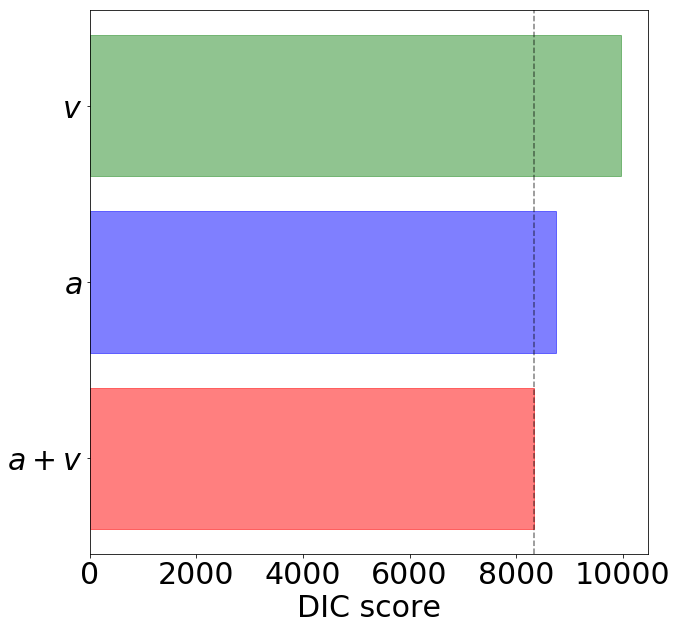

In [152]:
#for when i fit alternative models

fig_path = '/Users/Krista/Dropbox/volatileValues/m_plots/'

print("combined model DIC: %f" % comb_stim.dic)
print("drift model DIC: %f" % drift_stim.dic)
print("bound model DIC: %f" % bound_stim.dic)

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

names = [r'$a + v$',r'$a$',r'$v$']
dics = [comb_stim.dic,  bound_stim.dic, drift_stim.dic]
bars = plt.barh(names,dics, alpha=0.5)
plt.xlabel('DIC score')

bars[0].set_color('r')
bars[1].set_color('blue')
bars[2].set_color('forestgreen')

plt.axvline(comb_stim.dic, color='k', alpha=0.5, linestyle = '--')
plt.savefig(fig_path+'200t_DIC.pdf')

In [157]:
import numpy as np
dics = np.hstack(np.matrix((comb_stim.dic,  bound_stim.dic,  drift_stim.dic)))
# np.diff(dics)
header = ('combined_dic, a_dic, v_dic')
np.savetxt('200t_DICs.csv', dics, header = header, delimiter=',', comments='')

In [109]:
#model does not save... db is 'ram' error
# m_stim.save('1000t')

In [153]:
 comb_stim.print_stats('./200t_comb_stats.csv')
 drift_stim.print_stats('./200t_drift_stats.csv')
 bound_stim.print_stats('./200t_bound_stats.csv')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [154]:
comb_stim.print_stats()

AttributeError: 'DataFrame' object has no attribute 'close'